In [16]:
# all imports
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, os.path.abspath('./src'))


from torch.utils.data import DataLoader
from torchvision import transforms
from datasets.preprocess import *
from datasets.detected_car_dataset import *
import matplotlib.pyplot as plt

from yolo.utils import plot_boxes




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


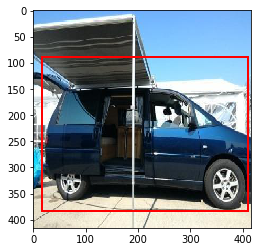

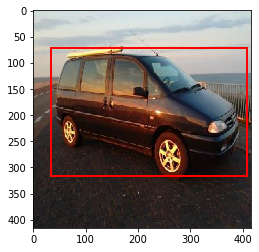

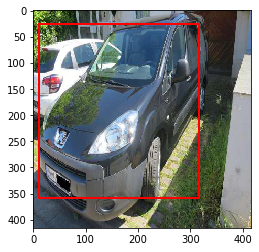

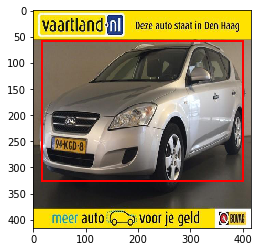

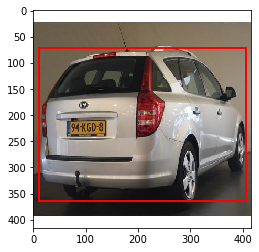

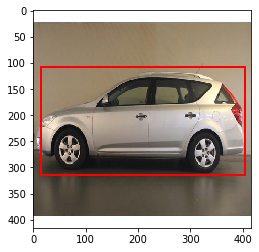

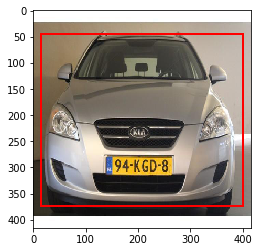

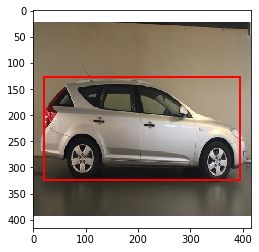

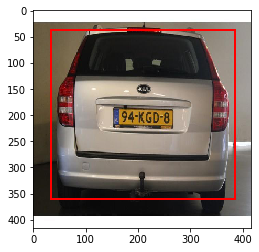

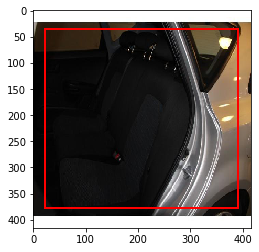

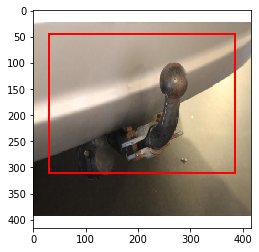

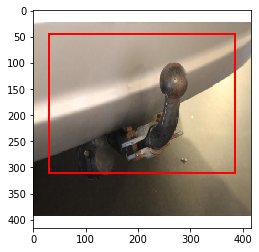

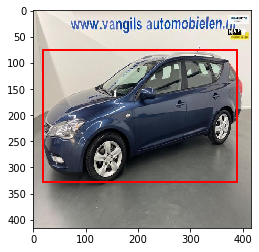

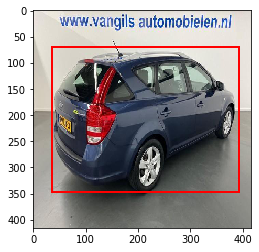

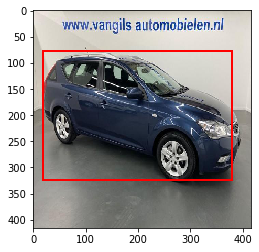

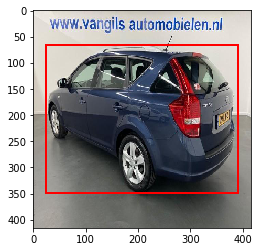

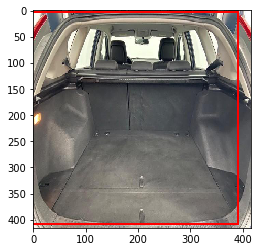

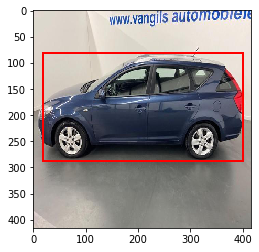

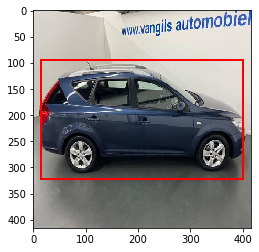

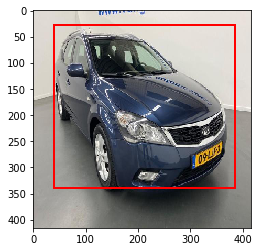

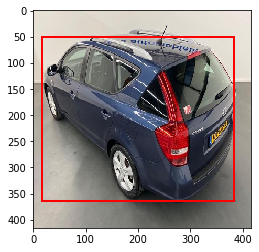

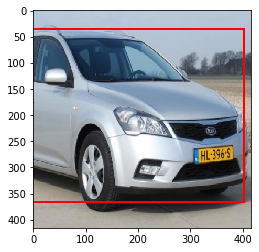

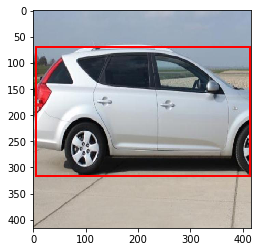

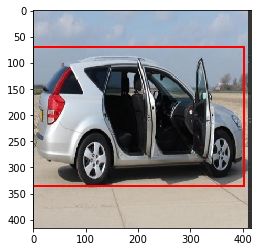

In [20]:
batch_size = 2
to_pil_image = transforms.Compose([
        ToPILImage()
    ])

image_and_target_transform = Compose([
        SquashResize(416),
        CocoToTensor()
    ])

dataset = DetectedCarDataset('/home/peter/datasets/detected-cars/2019-11-19T16-32-50/feed.json', 
                             transforms=image_and_target_transform,
                             batch_size=batch_size)

data_loader = DataLoader(dataset=dataset, shuffle=False, batch_size=batch_size)
limit = 10

for batch_i, (images, annotations, _) in enumerate(data_loader):
    
    boxes_for_batch = dataset.get_ground_truth_boxes(annotations)
    for b_i in range(batch_size):
        image = images[b_i]
        boxes = boxes_for_batch[b_i]
        pil_image = to_pil_image(image)
        plot_boxes(pil_image, boxes, [], False)
        
    if batch_i > limit:
        break

    
